# Increased Laserpower

In [12]:
from skimage.io import imread
import pyclesperanto_prototype as cle
import napari
from skimage.io import imread, imshow, imsave
import pyclesperanto_prototype as cle
import numpy as np
import apoc
import matplotlib.pyplot as plt
import matplotlib

cle.select_device("Intel(R) Iris(TM) Plus Graphics 640")

<Intel(R) Iris(TM) Plus Graphics 640 on Platform: Apple (2 refs)>

### 1.) Data Selection

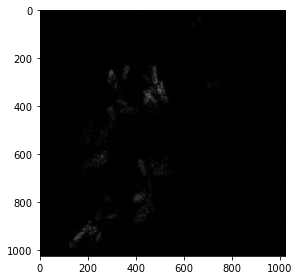

In [2]:
image_01 = imread('../../crystal data/proof normalization data/image/img_20220520_hsp-mKate-DN-dynactin_56hpf_1_normal.tif')
imshow(image_01)

/Users/mara/opt/anaconda3/envs/devbio-napari-env5/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


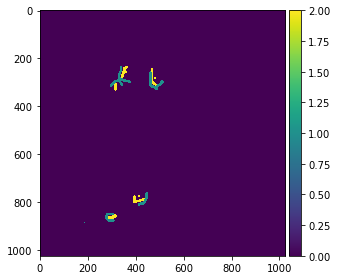

In [3]:
annotation_01 = imread('../../crystal data/proof normalization data/masks/img_20220520_hsp-mKate-DN-dynactin_56hpf_1_normal.tif')
imshow(annotation_01)

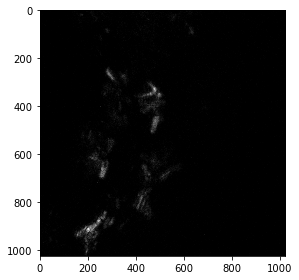

In [4]:
image_02 = imread('../../crystal data/proof normalization data/higher laserpower/img2_20220520_hsp-mKate-DN-dynactin_56hpf_1_0.2.tif')
imshow(image_02)

### 2.) Normalization

In [5]:
def normalize(image):
    normalized_image = image / np.percentile(image,99)
    return normalized_image

In [6]:
norm_image_01 = normalize(image_01)

In [7]:
norm_image_02 = normalize(image_02)

### 3.) Segmenter Training

In [8]:
# define features
features = "gaussian_blur=1 difference_of_gaussian=1 laplace_box_of_gaussian_blur=1 sobel_of_gaussian_blur=1"

# this is where the model will be saved
cl_filename = 'overfitting_segmenter_01.cl'

apoc.erase_classifier(cl_filename)
clf_01 = apoc.ObjectSegmenter(opencl_filename=cl_filename)
clf_01.train(features, annotation_01, image_01)

In [9]:
# this is where the model will be saved
cl_filename = 'overfitting_segmenter_norm_01.cl'

apoc.erase_classifier(cl_filename)
clf_norm_01 = apoc.ObjectSegmenter(opencl_filename=cl_filename)
clf_norm_01.train(features, annotation_01, norm_image_01)

### 4.) Prediction

In [10]:
segmentation_result_image_01 = clf_01.predict(features=features, image=image_01)
segmentation_result_norm_image_01 = clf_norm_01.predict(features=features, image=norm_image_01)
segmentation_result_image_02 = clf_01.predict(features=features, image=image_02)
segmentation_result_norm_image_02 = clf_norm_01.predict(features=features, image=norm_image_02)

In [17]:
font = {'size' : 13}
matplotlib.rc('font',**font)

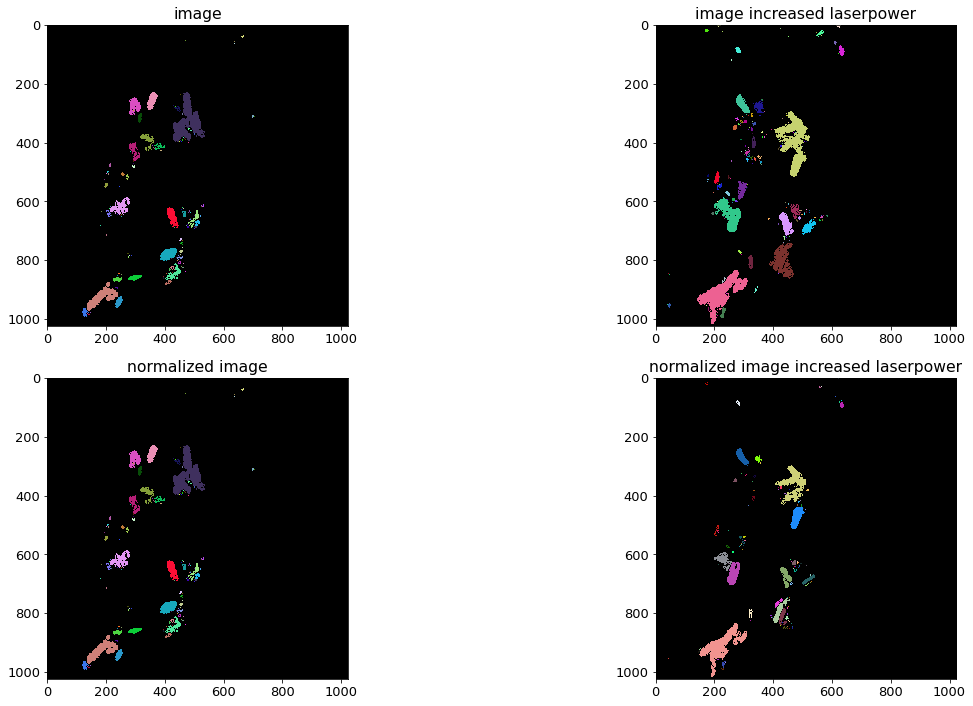

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
cle.imshow(segmentation_result_image_01, labels = True, plot=axs[0,0])
axs[0,0].set_title("image")
cle.imshow(segmentation_result_norm_image_01, labels = True, plot=axs[1,0])
axs[1,0].set_title("normalized image")
cle.imshow(segmentation_result_image_02, labels = True, plot=axs[0,1])
axs[0,1].set_title("image increased laserpower")
cle.imshow(segmentation_result_norm_image_02, labels = True, plot=axs[1,1])
axs[1,1].set_title("normalized image increased laserpower")

plt.tight_layout()